# Transformada de Fourier

Este notebook servirá para a definição do que é uma transformada de Fourier e demonstrar algumas propriedades da transformada. Este notebook servirá para a continuação do estudo de Séries de Fourier fornecido no curso de Introdução ao Processamento de Dados Sísmicos.   

## O que é uma Transformada de Fourier?

**Definição 1**: Uma função $f: \mathbb{R} \rightarrow \mathbb{R}$ terá como sua transformada uma função $F: \mathbb{R} \rightarrow \mathbb{C}$ definida pela expressão 

$$ F(\omega) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{+\infty} f(x) e^{i\omega x} d\omega.$$

O resultado da transformada de Fourier é uma função complexa, que indica a intensidade de cada uma das frequências em um intervalo infinitesimal. Portanto, é a combinação linear das frequências.

**Obs¹.:** Denota-se por transformada de Fourier da função $f(x)$ por $\mathcal{F}[f(x)]$.


**Definição 2**: Se uma função $F: \mathbb{R} \rightarrow \mathbb{C}$ terá como transformada de Fourier inversa $f: \mathbb{R} \rightarrow \mathbb{R}$ é definida pela expressão

$$ f(x) = \frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{+\infty} F(\omega) e^{-i\omega x} dx. $$

**Obs².:** Denota-se por transforma de Fourier inversa da função $F(\omega)$ por $\mathcal{F}^{-1}[F(\omega)]$.


**Propriedades**:

[Linearidade] $\mathcal{F}[a \, f(x) + b \, g(x)] = a \, \mathcal{F}[f(x)] + b \, \mathcal{F}[g(x)]$

[Diferenciação] $\mathcal{F}[f^{(n)}(x)] = (-i\omega)^n \mathcal{F}[f(x)]$

[Atraso] $\mathcal{F}[f(x + \Delta x)] = \mathcal{F}[f(x)] e^{-i\omega \Delta x}$



## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Função retangular

A função retangular é definida como:

$$ f(x) =\begin{cases}
 & 1, \quad \text{se} \left\lvert x \right\rvert  < 1 \\
 & 0, \quad \text{se}  \left\lvert x \right \rvert > 1 
\end{cases} $$

Neste sentido, ao resolvermos a transformada de Fourier para esta função, teremos uma função na frequência igual a:

$$ F(\omega) = \sqrt{\frac{2}{\pi}} \frac{\sin{\omega}}{\omega}$$. 

In [2]:
n = 1000
x = np.linspace(-20., 20., n)

In [3]:
def rectangular_pulse(x):
    """
    Function for calculating a rectangular pulse for FFT
    """
    
    y = np.zeros(x.size)
    for i in range(x.size):
        if np.abs(x[i])<1.:
            y[i] = 1.
        elif np.abs(x[i])>1:
            y[i] = 0.
    return y

In [4]:
f_rec = rectangular_pulse(x)

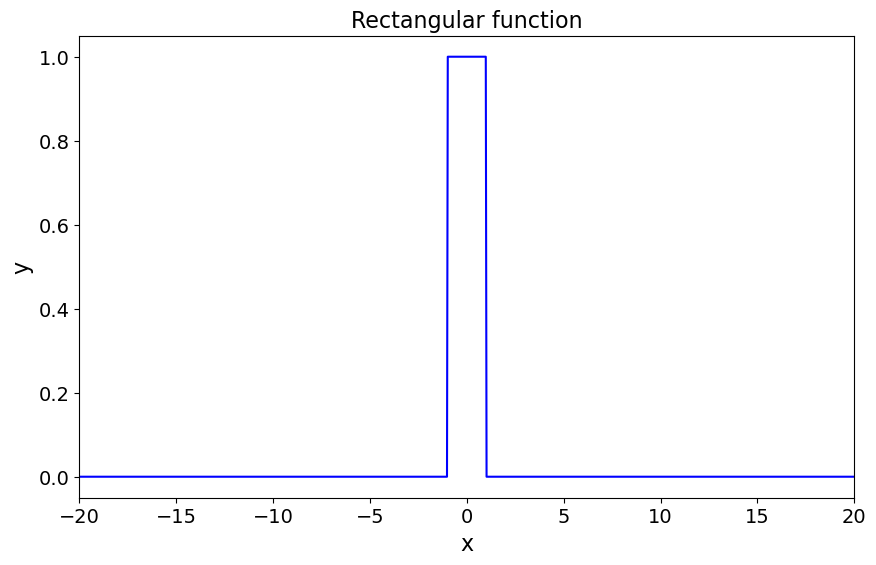

In [5]:
plt.figure(figsize=(10,6))
plt.title('Rectangular function',fontsize=16)
plt.plot(x,f_rec,'b-')
plt.xlim(np.min(x),np.max(x))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()

### Função exponencial 

A função exponencial é definida como:

$$f(x) =\begin{cases}
 & e^{-a x}, \quad \text{se}  \quad x,a  > 0 \\
 & \quad \,  0, \quad \text{se}  \quad x < 0 
\end{cases}$$

Neste sentido, ao resolvermos a transformada de Fourier para esta função, teremos uma função na frequência igual a:

$$ F(\omega) = \frac{1}{\sqrt{2 \pi} (a+i\omega)}$$. 

In [6]:
n = 1000
x = np.linspace(-20., 20., n)

In [7]:
def exponential_pulse(x):
    """
    Function for calculating an exponential pulse for FFT
    """
    y = np.empty(x.size)
    for i in range(x.size):
        if x[i]>0 :
            y[i] = np.exp(-2*x[i])
        elif x[i]<0 :
            y[i] = 0.
    
    return y
    

In [8]:
f_exp = exponential_pulse(x)

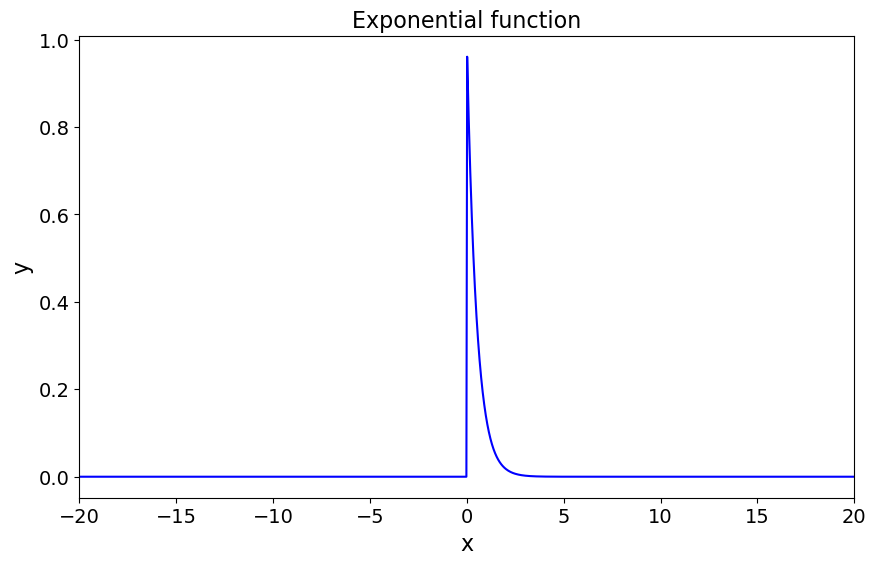

In [9]:
plt.figure(figsize=(10,6))
plt.title('Exponential function',fontsize=16)
plt.plot(x,f_exp,'b-')
plt.xlim(np.min(x),np.max(x))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()

## Implementando uma transformada de Fourier

In [10]:
def ft(x,f,w,dx,n):
    """
    Implementing a dummy fourier transform
    """
    
    F = np.empty(n) + 0j
    for i in range(n):
        F[i] = np.sum(f*np.exp(-1j*w[i]*x))*dx
        F[i] /= np.sqrt(2.*np.pi) 
    
    return (F)

def ift(x,F,w,dw,n):
    """
    Implementing an inverse dummy fourier transform
    """
    
    f = np.empty(n) 
    for i in range(n):
        f[i] = np.real(np.sum(F*np.exp(1j*w*x[i]))*dw)
        f[i] /= np.sqrt(2.*np.pi) 
    
    return f

### Para o pulso retangular

In [11]:
dx = 40./(n-1)
dw = 2.*np.pi/n/dx
w = np.arange(n)*dw - n*dw/2

In [12]:
F_rec_analytics = np.sqrt(2./np.pi)*(np.sin(w)/w)

/tmp/ipykernel_31139/373637758.py:1: RuntimeWarning: invalid value encountered in divide
  F_rec_analytics = np.sqrt(2./np.pi)*(np.sin(w)/w)


In [13]:
F_rec = ft(x,f_rec,w,dx,n)

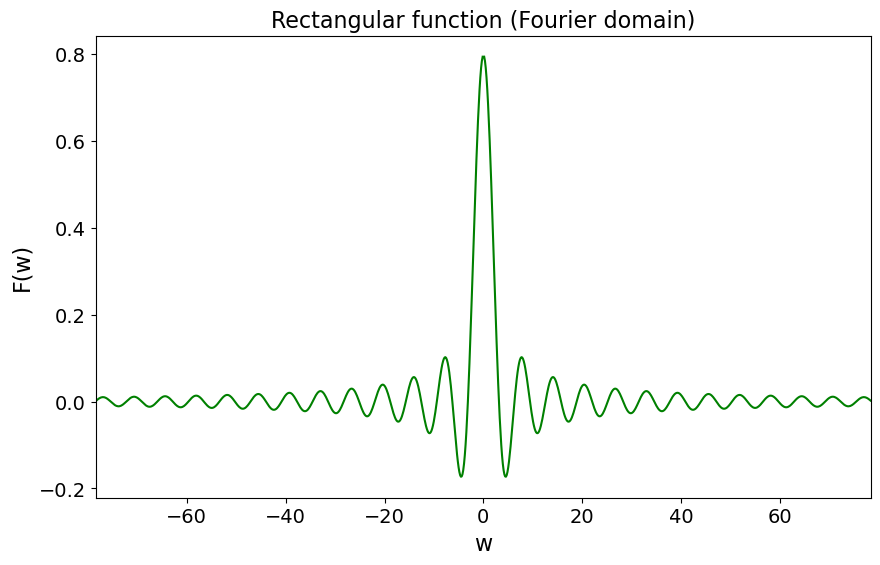

In [14]:
plt.figure(figsize=(10,6))
plt.title('Rectangular function (Fourier domain)',fontsize=16)
plt.plot(w,F_rec_analytics,'g-')
plt.xlim(np.min(w),np.max(w))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('w',fontsize=16)
plt.ylabel('F(w)',fontsize=16)
plt.show()

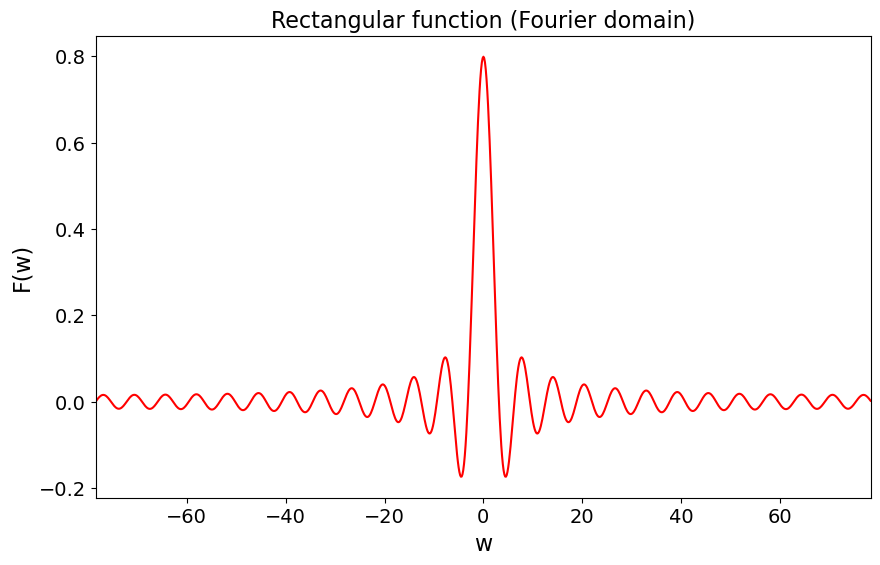

In [15]:
plt.figure(figsize=(10,6))
plt.title('Rectangular function (Fourier domain)',fontsize=16)
plt.plot(w,np.real(F_rec),'r-')
plt.xlim(np.min(w),np.max(w))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('w',fontsize=16)
plt.ylabel('F(w)',fontsize=16)
plt.show()

### Para o pulso exponencial 

In [16]:
F_exp = ft(x,f_exp,w,dx,n)

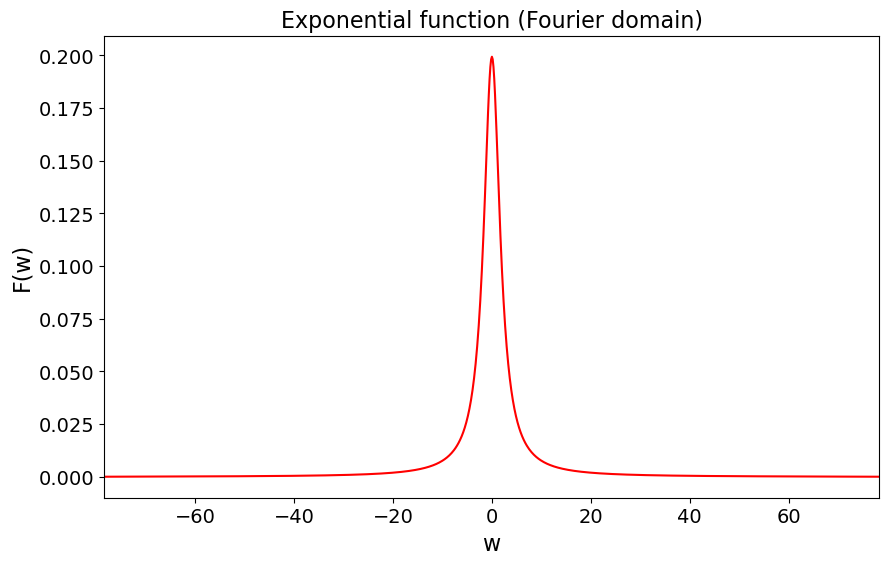

In [17]:
plt.figure(figsize=(10,6))
plt.title('Exponential function (Fourier domain)',fontsize=16)
plt.plot(w,np.real(F_exp),'r-')
plt.xlim(np.min(w),np.max(w))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('w',fontsize=16)
plt.ylabel('F(w)',fontsize=16)
plt.show()